Import libraries; set theme and palette https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40

In [3]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'out',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)


In [4]:
fig="Dispenses"
df = pd.read_csv('Figure_Data\\241001_CRISPRi_Dispenses.csv')
data_dispenses = df.copy()

# Set the palette
sns.set_palette(palette=enmax_palette)

# Pivot the data for the stacked bar plot
stacked_data = data_dispenses.pivot_table(index='Cycle', columns='Stage', values='Dispenses', aggfunc='sum', fill_value=0)

w = len(data_dispenses)/6
print(w)

# Plot the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, width=0.8, figsize=(w, 3.15), linewidth =line_size, edgecolor="0",)

# Set labels and formatting
plt.xlabel('Cycle', labelpad=15)
plt.ylabel('Liquid Handling Steps', labelpad=10)
plt.xticks(rotation='vertical', style='italic')

# Add legend
plt.legend(title='',labels=['Assembly','Digest and Ligate'], bbox_to_anchor=(0.5, 1.05), loc='lower center')

# Tighten layout and show the plot
plt.tight_layout()
plt.savefig(f'Figure_Export/{fig}.svg', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Figure_Data\\241001_CRISPRi_Dispenses.csv'

2.625 2


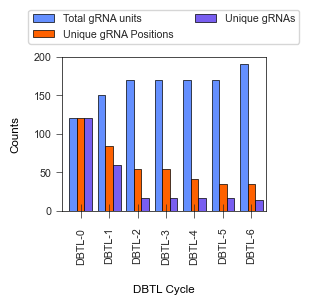

In [2]:
#KO_Strains
fig="Strains"
df = pd.read_csv('Figure_Data\\241001_CRISPRi_Strains.csv')
data=df.copy()

sns.set_palette(palette=enmax_palette)

w=len(data)/8
h=2
print(w,h)
plt.figure(figsize=(w,h))

#plot stripplot overlaid on a barplot
with sns.color_palette():
    ax = sns.barplot(data=data, x="Cycle", y="Counts", hue="Stage",
                     linewidth =line_size, edgecolor="0", saturation=1)
    
    # Retrieve legend handles and labels
    legend_handles, labels = ax.get_legend_handles_labels()

#format axes and legend
plt.xlabel('DBTL Cycle', labelpad=15)
plt.ylabel('Counts', labelpad=10)
plt.legend(legend_handles, labels, title='', bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2)


plt.ylim(0,200)
plt.xticks(rotation='vertical') 

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight', transparent=True)
plt.show()

6


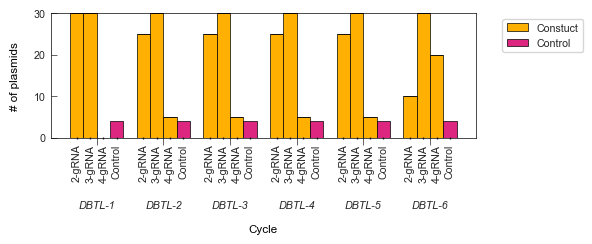

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Load and copy the data
figname = "Arrays_Sum"
df = pd.read_csv('Figure_Data\\241002_CRISPRi_Total_Arrays.csv')
data = df.copy()

# Set the palette
enmax_palette2 = ["#FFB000", "#DC267F"]
sns.set_palette(palette=enmax_palette2)

# Get unique categories
arrays = data['Array'].unique()
statuses = data['Status'].unique()
cycles = data['Cycle'].unique()

# Sort the cycles to ensure they are in order
cycles = np.sort(cycles)

# Create a pivot table with multi-index columns (Array and Status)
pivot_table = data.pivot_table(index='Cycle', columns=['Array', 'Status'], values='# Arrays', aggfunc='sum', fill_value=0)

# Calculate the width based on the number of cycles
w = len(cycles)
print(w)

# Set up the figure
fig, ax = plt.subplots(figsize=(w, 2.5))

# Define bar width and positions
total_bar_width = 0.8  # Total width for all bars in a group
n_arrays = len(arrays)
bar_width = total_bar_width / n_arrays
bar_positions = np.arange(len(cycles))

# Create a color palette for statuses
status_colors = sns.color_palette(n_colors=len(statuses))
status_color_dict = dict(zip(statuses, status_colors))

# Plot bars for each array
for i, array in enumerate(arrays):
    # Position of the group of bars
    x_positions = bar_positions + (i - n_arrays / 2) * bar_width + bar_width / 2
    # Bottom positions for stacking
    bottoms = np.zeros(len(cycles))
    # Plot each status on top of the previous
    for status in statuses:
        # Extract data for this array and status
        values = []
        for cycle in cycles:
            # Safely get the value or 0 if it doesn't exist
            try:
                value = pivot_table.loc[cycle, (array, status)]
            except KeyError:
                value = 0
            values.append(value)
        # Plot the bar segment
        ax.bar(x_positions, values, bar_width, bottom=bottoms, color=status_color_dict[status], edgecolor="0", linewidth=line_size, label=status if i == 0 else "")
        # Update bottoms for stacking
        bottoms += values

# Set x-axis labels and ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(cycles, rotation='horizontal', style='italic')

# Add minor ticks for arrays
ax.minorticks_on()  # Enable minor ticks
minor_ticks = []
minor_labels = []

# Set minor ticks between the major ticks
for i, cycle in enumerate(cycles):
    for j, array in enumerate(arrays):
        minor_ticks.append(bar_positions[i] + (j - (n_arrays / 2)) * bar_width + bar_width / 2)
        minor_labels.append(array)

ax.set_xticks(minor_ticks, minor=True)  # Set minor tick positions
ax.set_xticklabels(minor_labels, minor=True, rotation=90, ha='center')  # Set minor tick labels

# Set labels

ax.set_ylabel('# of plasmids', labelpad=10)
ax.tick_params(axis='x', which='major', pad=40)  # Increase pad for major ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(1))  # Disable minor ticks on y-axis
ax.set_xlabel('Cycle', labelpad=10)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tighten layout and show the plot
plt.tight_layout()
plt.savefig(f'Figure_Export/{figname}.svg', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()


4.8 3


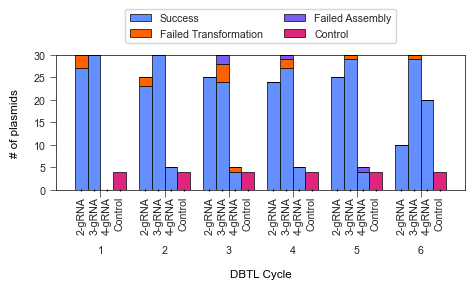

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Load and copy the data
figname = "Arrays"
df = pd.read_csv('Figure_Data\\241002_CRISPRi_Arrays.csv')
data = df.copy()

# Set the palette
sns.set_palette(palette=enmax_palette)

# Get unique categories
arrays = data['Array'].unique()
statuses = data['Status'].unique()
cycles = data['Cycle'].unique()

# Sort the cycles to ensure they are in order
cycles = np.sort(cycles)

# Create a pivot table with multi-index columns (Array and Status)
pivot_table = data.pivot_table(index='Cycle', columns=['Array', 'Status'], values='# Arrays', aggfunc='sum', fill_value=0)

# Calculate the width based on the number of cycles
w = len(cycles)/1.25
h = 3
print(w,h)

# Set up the figure
fig, ax = plt.subplots(figsize=(w, h))

# Define bar width and positions
total_bar_width = 0.8  # Total width for all bars in a group
n_arrays = len(arrays)
bar_width = total_bar_width / n_arrays
bar_positions = np.arange(len(cycles))

# Create a color palette for statuses
status_colors = sns.color_palette(n_colors=len(statuses))
status_color_dict = dict(zip(statuses, status_colors))

# Plot bars for each array
for i, array in enumerate(arrays):
    # Position of the group of bars
    x_positions = bar_positions + (i - n_arrays / 2) * bar_width + bar_width / 2
    # Bottom positions for stacking
    bottoms = np.zeros(len(cycles))
    # Plot each status on top of the previous
    for status in statuses:
        # Extract data for this array and status
        values = []
        for cycle in cycles:
            # Safely get the value or 0 if it doesn't exist
            try:
                value = pivot_table.loc[cycle, (array, status)]
            except KeyError:
                value = 0
            values.append(value)
        # Plot the bar segment
        ax.bar(x_positions, values, bar_width, bottom=bottoms, color=status_color_dict[status], edgecolor="0", linewidth=line_size, label=status if i == 0 else "")
        # Update bottoms for stacking
        bottoms += values

# Set x-axis labels and ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(cycles, rotation='horizontal')

# Add minor ticks for arrays
ax.minorticks_on()  # Enable minor ticks
minor_ticks = []
minor_labels = []

# Set minor ticks between the major ticks
for i, cycle in enumerate(cycles):
    for j, array in enumerate(arrays):
        minor_ticks.append(bar_positions[i] + (j - (n_arrays / 2)) * bar_width + bar_width / 2)
        minor_labels.append(array)

ax.set_xticks(minor_ticks, minor=True)  # Set minor tick positions
ax.set_xticklabels(minor_labels, minor=True, rotation=90, ha='center')  # Set minor tick labels

# Set labels

ax.set_ylabel('# of plasmids', labelpad=10)
ax.tick_params(axis='x', which='major', pad=35)  # Increase pad for major ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(1))  # Disable minor ticks on y-axis

# Change x-axis labels from 'DBTL-1', 'DBTL-2', etc. to '1', '2', etc.
current_labels = data["Cycle"].unique()
truncated_labels = [label.split('-')[1] for label in current_labels]
plt.gca().set_xticklabels(truncated_labels)
ax.set_xlabel('DBTL Cycle', labelpad=10)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='', bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2)

# Tighten layout and show the plot
plt.tight_layout()
plt.savefig(f'Figure_Export/{figname}.pdf', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()


3.0 3


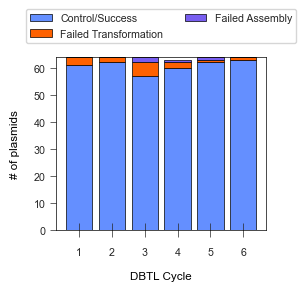

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Load and copy the data
figname = "Combined_Arrays"
df = pd.read_csv('Figure_Data\\241002_CRISPRi_Arrays.csv')
data = df.copy()

# Set the palette
sns.set_palette(palette=enmax_palette)

# Lump "Control" and "Success" statuses together
data['Combined_Status'] = data['Status'].replace({'Control': 'Control/Success', 'Success': 'Control/Success'})

# Get unique combined statuses and cycles
combined_statuses = data['Combined_Status'].unique()
cycles = data['Cycle'].unique()

# Sort the cycles to ensure they are in order
cycles = np.sort(cycles)

# Aggregate data by Cycle and Combined_Status
aggregated_data = data.groupby(['Cycle', 'Combined_Status'])['# Arrays'].sum().unstack(fill_value=0)

# Calculate the width based on the number of cycles
w = len(cycles) / 2
h = 3
print(w, h)

# Set up the figure
fig, ax = plt.subplots(figsize=(w, h))

# Define bar width and positions
bar_width = 0.8  # Width of each bar
bar_positions = np.arange(len(cycles))

# Create a color palette for combined statuses
combined_status_colors = sns.color_palette(n_colors=len(combined_statuses))
combined_status_color_dict = dict(zip(combined_statuses, combined_status_colors))

# Plot bars for each combined status
bottoms = np.zeros(len(cycles))
for combined_status in combined_statuses:
    values = aggregated_data[combined_status].values
    ax.bar(bar_positions, values, bar_width, bottom=bottoms, color=combined_status_color_dict[combined_status], edgecolor="0", linewidth=line_size, label=combined_status)
    bottoms += values

# Set x-axis labels and ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(cycles, rotation='horizontal')

# Set labels
ax.set_ylabel('# of plasmids', labelpad=10)
ax.yaxis.set_minor_locator(AutoMinorLocator(1))  # Disable minor ticks on y-axis

# Change x-axis labels from 'DBTL-1', 'DBTL-2', etc. to '1', '2', etc.
current_labels = data["Cycle"].unique()
truncated_labels = [label.split('-')[1] for label in current_labels]
plt.gca().set_xticklabels(truncated_labels)
ax.set_xlabel('DBTL Cycle', labelpad=10)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='', bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2)

# Tighten layout and show the plot
plt.tight_layout()
plt.savefig(f'Figure_Export/{figname}.pdf', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

1.8 3


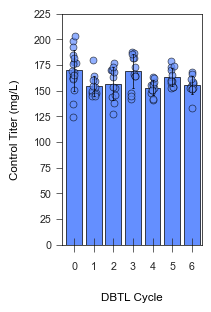

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data and sort by Cycle
figname = "Control_titers"
df = pd.read_csv('Figure_Data\\241113_Controls_Combined.csv')
df_sorted = df.sort_values(by=['Cycle'], ascending=True)

# Use the sorted DataFrame for plotting
data = df_sorted.copy()

# Define a color for the plots (replace with desired color hex)
plot_color = "#648FFF"  # Replace with your preferred color

# Adjust figure width based on data
w = len(data) / 50
h = 3
print(w, h)
plt.figure(figsize=(w, h))

# Plotting stripplot and barplot with the same color
sns.stripplot(
    data=data, x="Cycle", y="Titer",
    dodge=True, alpha=0.7, linewidth=line_size, color=plot_color,
    edgecolor="0", zorder=2)

sns.barplot(
    data=data, x="Cycle", y="Titer",
    errorbar="sd", zorder=0, capsize=0.1, errcolor="0", errwidth=0.5,
    linewidth=line_size, edgecolor="0", saturation=1, color=plot_color)

plt.xlim(-0.6, len(data["Cycle"].unique()) - 0.5)

# Format axes
plt.xlabel('DBTL Cycle', labelpad=15)
plt.ylabel('Control Titer (mg/L)', labelpad=10)
#plt.xticks(rotation='vertical')
plt.ylim(0, 225)

# Change x-axis labels from 'DBTL-1', 'DBTL-2', etc. to '1', '2', etc.
current_labels = data["Cycle"].unique()
truncated_labels = [label.split('-')[1] for label in current_labels]
plt.gca().set_xticklabels(truncated_labels)

# Save the figure
plt.savefig(f'Figure_Export/{figname}.pdf', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

4 1.5


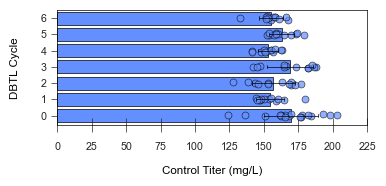

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data and sort by Cycle
figname = "Control_titers"
df = pd.read_csv('Figure_Data\\241113_Controls_Combined.csv')
df_sorted = df.sort_values(by=['Cycle'], ascending=True)

# Use the sorted DataFrame for plotting
data = df_sorted.copy()

# Define a color for the plots (replace with desired color hex)
plot_color = "#648FFF"  # Replace with your preferred color

# Adjust figure width based on data
w = 4
h = len(data) / 60
print(w, h)
plt.figure(figsize=(w, h))

# Plotting stripplot and barplot with the same color
sns.stripplot(
    data=data, y="Cycle", x="Titer",
    dodge=True, alpha=0.7, linewidth=line_size, color=plot_color,
    edgecolor="0", zorder=2)

sns.barplot(
    data=data, y="Cycle", x="Titer",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.5,
    linewidth=line_size, edgecolor="0", saturation=1, color=plot_color)

plt.ylim(-0.6, len(data["Cycle"].unique()) - 0.5)

# Format axes
plt.ylabel('DBTL Cycle', labelpad=15)
plt.xlabel('Control Titer (mg/L)', labelpad=10)
plt.xlim(0, 225)

# Change y-axis labels from 'DBTL-1', 'DBTL-2', etc. to '1', '2', etc.
current_labels = data["Cycle"].unique()
truncated_labels = [label.split('-')[1] for label in current_labels]
plt.gca().set_yticklabels(truncated_labels)

# Save the figure
plt.savefig(f'Figure_Export/{figname}.pdf', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

4.0 2.5


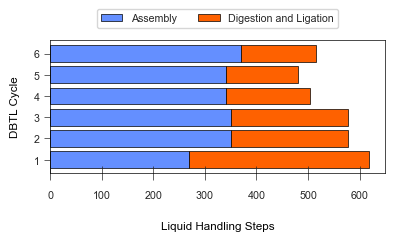

In [41]:
fig="Dispenses"
df = pd.read_csv('Figure_Data\\241001_CRISPRi_Dispenses.csv')
data_dispenses = df.copy()

# Set the palette
sns.set_palette(palette=enmax_palette)

# Pivot the data for the stacked bar plot
stacked_data = data_dispenses.pivot_table(index='Cycle', columns='Stage', values='Dispenses', aggfunc='sum', fill_value=0)

w = len(data_dispenses)/3
h=2.5
print(w,h)

# Plot the stacked bar chart
ax = stacked_data.plot(kind='barh', stacked=True, width=0.8, figsize=(w, h), linewidth =line_size, edgecolor="0",)

# Set labels and formatting
plt.xlabel('Liquid Handling Steps', labelpad=15)
plt.ylabel('DBTL Cycle', labelpad=10)
#plt.xticks(rotation='vertical')

current_labels = data["Cycle"].unique()
truncated_labels = [label.split('-')[1] for label in current_labels]
plt.gca().set_yticklabels(truncated_labels)

# Add legend
plt.legend(title='',labels=['Assembly','Digestion and Ligation'], bbox_to_anchor=(0.5, 1.05), loc='lower center',ncol=2)

# Tighten layout and show the plot
plt.tight_layout()
plt.savefig(f'Figure_Export/{fig}.pdf', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()
